<a target="_blank" href="https://colab.research.google.com/github/michalis0/Cloud-and-Advanced-Analytics/blob/main/labs/week_11/nx_tutorial_text.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Installation

```
pip install networkx python-louvain
```

In [1]:
# Dependendencies
# this package will be used for community detection
!pip install networkx python-louvain

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=87c6c00e8ddf96076f64b285d341a4a69f00bf99fdb0515374d7adfc0e8fed36
  Stored in directory: /Users/rob/Library/Caches/pip/wheels/af/40/91/ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import collections
from community import community_louvain
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/aajalloe/opt/anaconda3/envs/caa24/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
nx.__version__

'2.5'

## Introducting Networkx

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Using networkx API you are able to easily build networks. Moreover, NetworkX has a broad range of example networks that you can load with just a function call ([more examples here](https://networkx.github.io/documentation/stable/auto_examples/index.html)).


Let's start by building a simple **undirected graph**

### Creating and Visualizing a simple Undirected Graph

In [3]:
G = nx.Graph() # for a directed graph use nx.DiGraph()
G.add_node(1)
G.add_nodes_from(range(2,10))  # add multiple nodes at once

# add edges 
G.add_edge(1,2)
edges = [(2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,1)]
G.add_edges_from(edges)
print(G.nodes())
print(G.is_directed())

[1, 2, 3, 4, 5, 6, 7, 8, 9]
False


In [4]:
G.edges()

EdgeView([(1, 2), (1, 9), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

To get a quick overview on the properties of the graph you can use the `nx.degree()` method.

In [5]:
print(nx.degree(G))

[(1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)]


The library also has a built-in plotting engine (based on matplotlib). Note that the `draw_spring` method plots the graph based on the "spring" layout. For more layouts checkout [this](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) page.

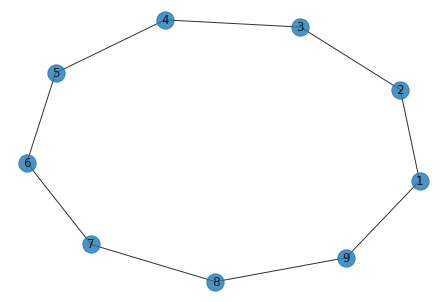

In [6]:
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

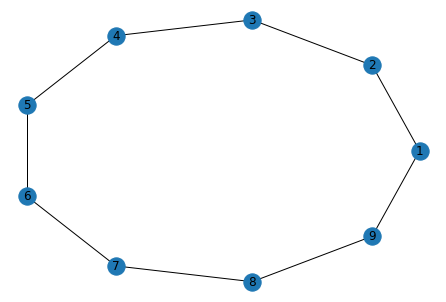

In [7]:
nx.draw_circular(G, with_labels=True)

In [8]:
# Helper function for plotting the degree distribution of a Graph
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

In [9]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(nx.degree(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
#     print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
#     # #closed-triplets(3*#triangles)/#all-triplets
#     print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [21]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    # plt.axis('off')

### Creating and Visualizing an Erdős–Rényi graph
Erdos-Renyi graph is a random graph. It is built by choosing each of the possible edges with a probability $p$.

[(0, 4), (1, 4), (2, 6), (3, 3), (4, 4), (5, 5), (6, 3), (7, 3), (8, 7), (9, 3)]
Avg. Shortest Path Length: 1.5778
Diameter: 3.0000


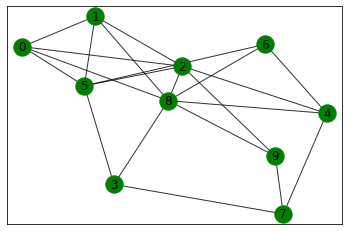

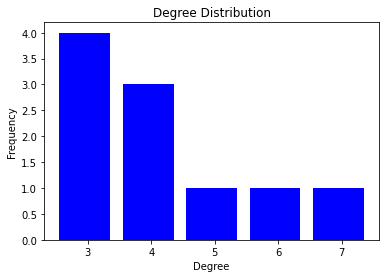

In [22]:
n = 10  # 10 nodes
p = 0.5 # probability of edge creation

erG = nx.random_graphs.erdos_renyi_graph(n=n, p=p)

describe_graph(erG)
visualize_graph(erG, k=0.05, alpha=0.8)
plot_degree_distribution(erG)

In [12]:
# adjacency matrix of the graph
nx.adjacency_matrix(erG).todense()



matrix([[0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
        [1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 1, 1, 0, 0]])

You can also compute page ranks of the nodes in a graph

{0: 0.1486831271893184,
 1: 0.10620246734450868,
 2: 0.41376305879413117,
 3: 0.22514887932753325,
 4: 0.10620246734450868}

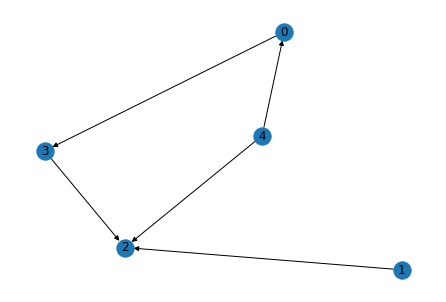

In [13]:
num_nodes = 4
# Create a new directed graph
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(4,2), (3,2), (1,2), (0,3), (4,0)])
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Exercise

We want to build a graph from the folowing adjacency matrix. Before converting the matrix to a networkx graph, can you say whether this adjacency matrix belong to a directed or undirected graph?

In [14]:
adj_mat = np.array([[0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
                    [0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
                    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                    [1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
                    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
                    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
# compute whether the graph is directed only with numpy operations.
# reminder: to transpose matrix a in numpy: `a.T`

#####YOUR CODE#####


Now build the networkx graph from the above matrix and check if you answer to the above question is correct.

In [ ]:
# Build the nx graph

#### YOUR CODE ####
#G_ex = nx.from_numpy_array()

# check if the graph is undirected or directed
#### YOUR CODE ####



Another feature that characterizes the structure and position of a node in a graph is called __clustering coefficient__. This coefficient measures how connected the neighbors of a node are.

Compute the clustering coefficient for nodes 4 and 6?

In [ ]:
# clustering coefficient
#### YOUR CODE #####
#nx.clustering(...)

####################

One interpretation of clustering coefficient is that it counts the number of traingles that a node is involved in. In other words for node a:

$$ clustering(a) = \frac{\# \text{number of distinct triagles that a is a corner of}}{C_2^{\# \text{neighbors of a}}} $$
where $C_k^n$ is choice k elements from n elements.

Draw the graph `G_ex` and try to justify the value of the clustering coefficient for nodes 4 and 6 according to the above interpretation.

In [ ]:
# draw the network
#### YOUR CODE ####


### Creating and Visualizing the Zachary's Karate Club Network
Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate (description from [wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club))

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
Avg. Shortest Path Length: 2.4082
Diameter: 5.0000


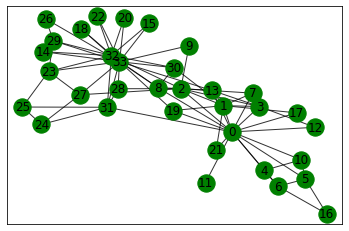

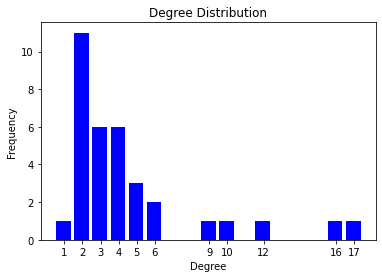

In [23]:
karateG = nx.karate_club_graph()
describe_graph(karateG)
visualize_graph(karateG, k=0.05, alpha=0.8)
plot_degree_distribution(karateG)

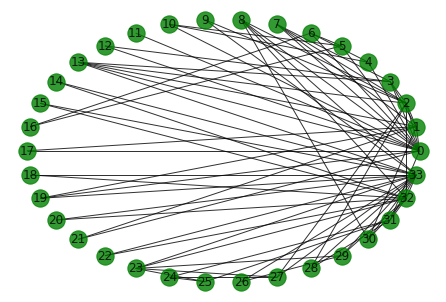

In [24]:
# Draw the graph with a circular layout 
nx.draw_circular(karateG, with_labels=True,  node_color='g', alpha = 0.8)

### Connected Components
From the above visualization, it is obvious that this graph is connected. We can also check this using the `is_connected()` method.

In [25]:
print(nx.is_connected(karateG))
comp = list(nx.connected_components(karateG))
print('The graph contains', len(comp), 'connected components')

True
The graph contains 1 connected components


### Diameter and Shortest Paths
Suppose I want to find the shortest path between two nodes, given that they are in the same connected component.

In [26]:
path_16_30 = nx.shortest_path(karateG, source=16, target=30)
print("Shortest path between nodes 16 and 30:", path_16_30)

Shortest path between nodes 16 and 30: [16, 5, 0, 1, 30]


The diameter of a graph is the longest shortest path between any two nodes (or in other words the maximum value of the shortest path lengths in a graph).

In [27]:
# diameter
print("The diameter of the karate club graph: ", nx.diameter(karateG))
# compare with the avg shortest path in the graph
print("The avg shortest path length of the karate club graph: ", nx.average_shortest_path_length(karateG))

The diameter of the karate club graph:  5
The avg shortest path length of the karate club graph:  2.408199643493761


### Important nodes in a graph

#### 1- Degree: the more interactions a node has, the more important it is.

In [28]:
degrees = dict(karateG.degree(karateG.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

for i in range(5):
    print("{}- node {} with degree {}.".format(i, sorted_degree[i][0], sorted_degree[i][1]))

0- node 33 with degree 17.
1- node 0 with degree 16.
2- node 32 with degree 12.
3- node 2 with degree 10.
4- node 1 with degree 9.


Let's also analyze the *degree distribution*. 
We can see that most of the node have a small degree and there are only a few nodes with a large degree.

In [34]:
degreeCount['index'].values

array([17, 16, 12, 10,  9,  6,  5,  4,  3,  2,  1])

Text(0.5, 1.0, 'Degree distribution for the karate club graph')

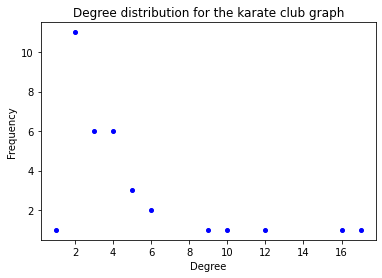

In [35]:
degree_seq = [d[1] for d in sorted_degree]
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict( degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'].values, degreeCount[0].values, 'o', c='blue', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the karate club graph')

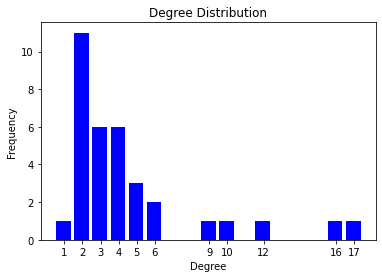

In [36]:
# As a bar plot
plot_degree_distribution(karateG)

#### 2- Betweeness centrality: the more shortest paths pass through a node, the more important it is!

In [37]:
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(karateG)
# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(karateG, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for i, bw in sorted_betweenness[:5]:
    print("node {} has betweeness: {}".format(i, bw))

node 0 has betweeness: 0.43763528138528146
node 33 has betweeness: 0.30407497594997596
node 32 has betweeness: 0.145247113997114
node 2 has betweeness: 0.14365680615680618
node 31 has betweeness: 0.13827561327561325


Let's analyze the betweeness centrality values for all the nodes in the network. As in the case with degree, there are a *few nodes with very high betweeness centrality*, while most of them have a low value.

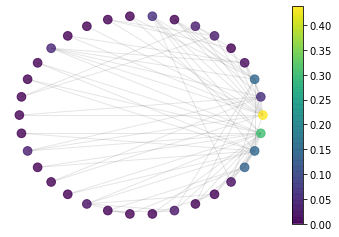

In [38]:
list_nodes =list(karateG.nodes())
list_nodes.reverse()   # for showing the nodes with high betweeness centrality 
pos = nx.circular_layout(karateG)
ec = nx.draw_networkx_edges(karateG, pos, alpha=0.1)
nc = nx.draw_networkx_nodes(karateG, pos, nodelist=list_nodes, node_color=[karateG.nodes[n]["betweenness"] for n in list_nodes], 
                            alpha=0.8, node_shape = '.')
plt.colorbar(nc)
plt.axis('off')
plt.show()

Note that it is not always the case that the node with the highest degree has also the highest betweenness cenetrality. For instance, look at the following example.

In [39]:
G = nx.Graph() 
G.add_nodes_from(range(1,10))  # add multiple nodes at once

# add edges 
edges = [(1,2), (2,3), (3,4), (4,1), (1,3), (2,4), (6,7),
        (4,9), (9,5),
        (5,6), (6,7), (7,8), (8,5), (5,7), (6,8)]
G.add_edges_from(edges)
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

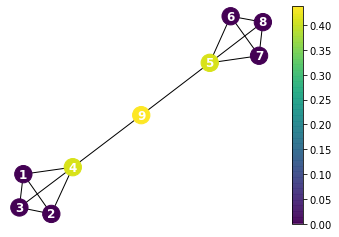

In [40]:
nx.set_node_attributes(G, nx.betweenness_centrality(G), 'betweenness')
pos = nx.spring_layout(G)
ec = nx.draw_networkx(G, pos, nodelist=G.nodes(),
                         node_color=[G.nodes[n]["betweenness"] for n in G.nodes()], 
                         node_shape = '.', node_size=1200, font_color="white", font_weight="bold")
plt.colorbar(nc)
plt.axis('off')
plt.show()

The node with the **lowest degree** is the one with the **highest betweeness centrality**. 


### Community detection

Community detection is a common class of methods to partition the graph into several clusters. The detected communities can help us to understand hidden relationship among different groups of nodes in a network. In this tutorial we use the [Louvain method](https://en.wikipedia.org/wiki/Louvain_Modularity) which is a 
clustering algorithm and has become a standard algorithm in the data scientist toolbox. In this method, initially every node is considered as a community. The communities are traversed, and for each community it is tested whether by joining it to a neighboring community, we can obtain a better clustering.

In [41]:
partition = community_louvain.best_partition(karateG, resolution=2)
# add it as an attribute to the nodes
for n in karateG.nodes:
    karateG.nodes[n]["louvain"] = partition[n]

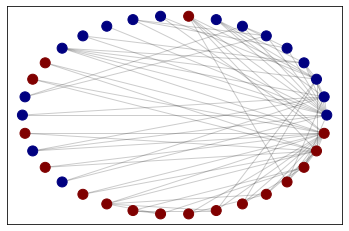

In [43]:
# plot it out
pos = nx.circular_layout(karateG)
ec = nx.draw_networkx_edges(karateG, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(karateG, pos, nodelist=karateG.nodes(), node_color=[karateG.nodes[n]["louvain"] for n in karateG.nodes], 
                            node_size=100, cmap=plt.cm.jet)
# plt.axis('off')
plt.show()

Let's check if the detected communities are consistent with the clubs each node belongs to.

In [44]:
print("community 0: ")
l = [karateG.nodes[i]["club"] for i in range(len(karateG.nodes)) if karateG.nodes[i]["louvain"]==0]
print(" - ".join(l))
print("community 1: ")
l = [karateG.nodes[i]["club"] for i in range(len(karateG.nodes)) if karateG.nodes[i]["louvain"]==1]
print(" - ".join(l))

community 0: 
Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Officer - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi - Mr. Hi
community 1: 
Mr. Hi - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer - Officer
